In [174]:
import os
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
import pandas as pd
df=pd.read_csv('Dataset.csv')

In [175]:
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

### firstly this is supervised learning model(labels are given)

### target variable is descrete

###  so this is a classification problem

### Unique Values

In [176]:
for i in df.columns:
    print("Unique of {}'s count is :{}".format(i,df[i].nunique()))

Unique of Churn's count is :2
Unique of AccountWeeks's count is :212
Unique of ContractRenewal's count is :2
Unique of DataPlan's count is :2
Unique of DataUsage's count is :174
Unique of CustServCalls's count is :10
Unique of DayMins's count is :1667
Unique of DayCalls's count is :119
Unique of MonthlyCharge's count is :627
Unique of OverageFee's count is :1024
Unique of RoamMins's count is :162


### Null Values

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### DUPLICATES

In [178]:
df.duplicated().sum()

0

#  Data Analysis

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df.shape

(3333, 11)

In [180]:
df.describe(percentiles=[0.25,0.35,0.75,0.85,0.90,0.95,0.99])

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
35%       0.000000     86.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
85%       0.000000    142.000000         1.000000     1.000000     2.700000   
90%       1.000000    152.000000         1.000000     1.000000     3.050000   
95%       1.000000    167.000000         1.000000     1.000000     3.460000   
99%       1.000000    195.000000         1.000000     1.000000     4.100000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
35%         1.000000   157.920000    93.000000      48.000000     9.030000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
85%         3.000000   236.300000   121.000000      75.200000    12.710000   
90%         3.000000   249.580000   126.000000      80.500000    13.290000   
95%         4.000000   270.740000   133.000000      87.800000    14.220000   
99%         6.000000   305.168000   146.000000      98.280000    15.946800   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
35%       9.300000  
50%      10.300000  
75%      12.100000  
85%      13.000000  
90%      13.700000  
95%      14.700000  
99%      16.668000  
max      20.000000

In [181]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [182]:
df.head(10)

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1       2.70              1   
1      0           107                1         1       3.70              1   
2      0           137                1         0       0.00              0   
3      0            84                0         0       0.00              2   
4      0            75                0         0       0.00              3   
5      0           118                0         0       0.00              0   
6      0           121                1         1       2.03              3   
7      0           147                0         0       0.00              0   
8      0           117                1         0       0.19              1   
9      0           141                0         1       3.02              0   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  
5    223.4        98           57.0       11.03       6.3  
6    218.2        88           87.3       17.43       7.5  
7    157.0        79           36.0        5.16       7.1  
8    184.5        97           63.9       17.58       8.7  
9    258.6        84           93.2       11.10      11.2

### Outliers

In [183]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [184]:
a=df['AccountWeeks'].quantile(0.25)
b=df['AccountWeeks'].quantile(0.75)

In [185]:
a,b

(74.0, 127.0)

In [186]:
iqr=b-a
iqr

53.0

In [187]:
ll=a-1.5*iqr
ul=b+1.5*iqr

In [188]:
ll,ul

(-5.5, 206.5)

### BOXPLOT

<AxesSubplot:xlabel='AccountWeeks'>

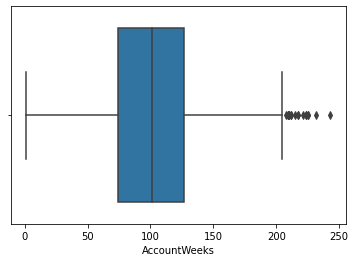

In [189]:
sns.boxplot(df['AccountWeeks'])

In [190]:
df['AccountWeeks']=np.where(df['AccountWeeks']>207,207,df['AccountWeeks'])

<AxesSubplot:xlabel='AccountWeeks'>

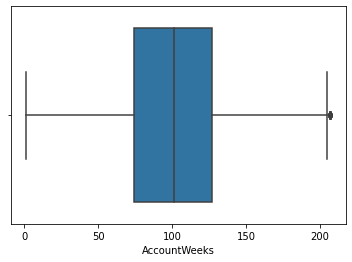

In [191]:
sns.boxplot(df['AccountWeeks'])

### we remove outliers in accountweeks

### analysis on variables

In [192]:
df.AccountWeeks.describe()

count    3333.000000
mean      101.006001
std        39.651316
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       207.000000
Name: AccountWeeks, dtype: float64

In [193]:
plt.figure(figsize=(10,7))
plt.hist(df['AccountWeeks'],edgecolor='red',bins=30)
plt.xlabel('weeks')
plt.ylabel('count')
plt.title('customers being active')
plt.show()

In [194]:
# Observation
## The maximum number of weeks that a customer being active is 243 weeks
## The minimum number of weeks that a customer being active is 1 week
## And the more number of weeks that the customers being active is in between 60 and 140 weeks

### PIE-PLOT

### ContractRenewal

In [195]:
r=df.ContractRenewal.value_counts(normalize=True)
r

1    0.90309
0    0.09691
Name: ContractRenewal, dtype: float64

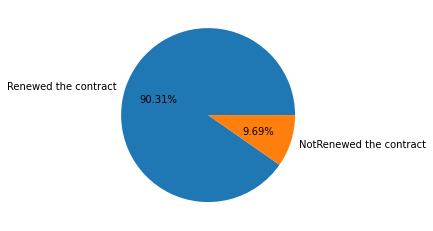

In [196]:
plt.pie(r,labels=['Renewed the contract','NotRenewed the contract'],autopct='%1.2f%%')
plt.show()

In [197]:
df.ContractRenewal.value_counts()
# Observation 
## Nearly 3000 customers have renewed the Contract
## and about 323 customers have not renewed the Contract# Observation 
 

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [198]:
# Observation 
## Nearly 3000 customers have renewed the Contract
## and about 323 customers have not renewed the Contract

### dataplan

In [199]:
## 1->> Indicates that the customers has the plan on going 
## 0->> Indicates that the customers has no plan

In [200]:
df['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

<AxesSubplot:xlabel='DataPlan', ylabel='count'>

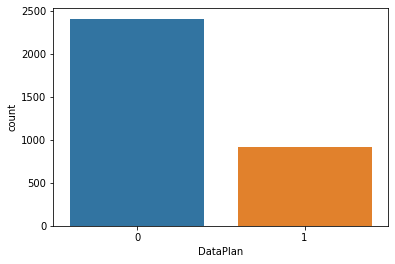

In [201]:
sns.countplot(df['DataPlan'])

### Data plan

In [202]:
d=df.DataPlan.value_counts(normalize=True)
d
plt.pie(d,labels=['Having the data plan','Not having the data plan'],autopct='%1.2f%%')
plt.show()

In [203]:
# Observation 
## About 72 % has no plan
## About 28 % has plan

### num of customer service calls 

In [204]:
df.CustServCalls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServCalls, dtype: int64

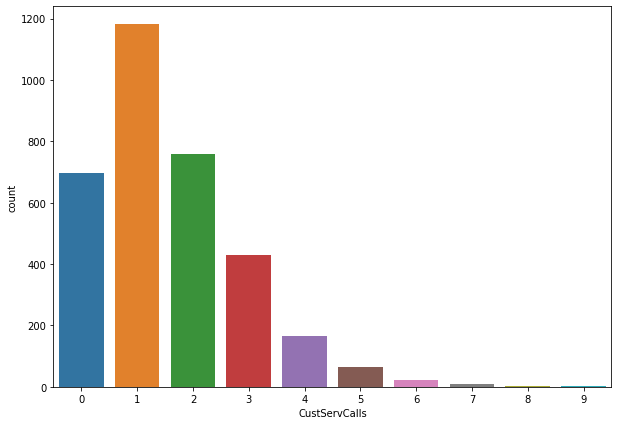

In [205]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='CustServCalls');

In [206]:
# Observation
## The max number of calls to customer service is found to be 1 i.e, 1181
## followed by 2 calls which is of 759 times and so on

In [207]:
df.hist(bins = 20, figsize = (20,10), color = 'b');

### Target variable...

In [208]:
#### in this our target variable is churn

In [209]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [210]:
c=df.Churn.value_counts()

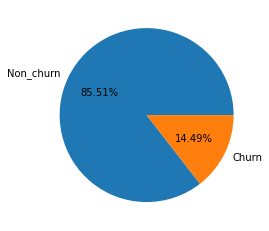

In [211]:
plt.pie(c,labels=['Non_churn','Churn'],autopct='%1.2f%%')
plt.show()

In [212]:
# Observation
## About 14% of the customers are have cancelled the Service
## And about 86% of the customers have not cancelled the Service

### Bivarient analysis 

<AxesSubplot:xlabel='DataPlan', ylabel='count'>

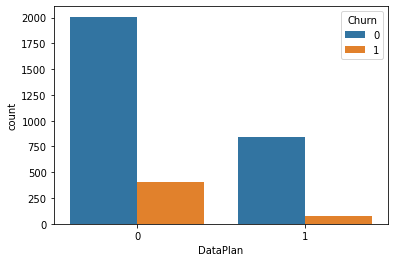

In [213]:
sns.countplot(x=df['DataPlan'],hue=df['Churn'],data=df)

<AxesSubplot:xlabel='ContractRenewal', ylabel='count'>

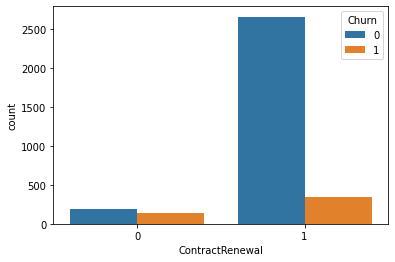

In [214]:
sns.countplot(x=df['ContractRenewal'],hue=df['Churn'],data=df)

<AxesSubplot:xlabel='CustServCalls', ylabel='count'>

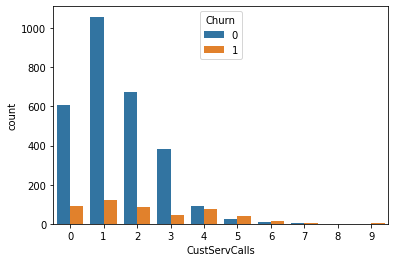

In [215]:
sns.countplot(x=df['CustServCalls'],hue=df['Churn'],data=df)

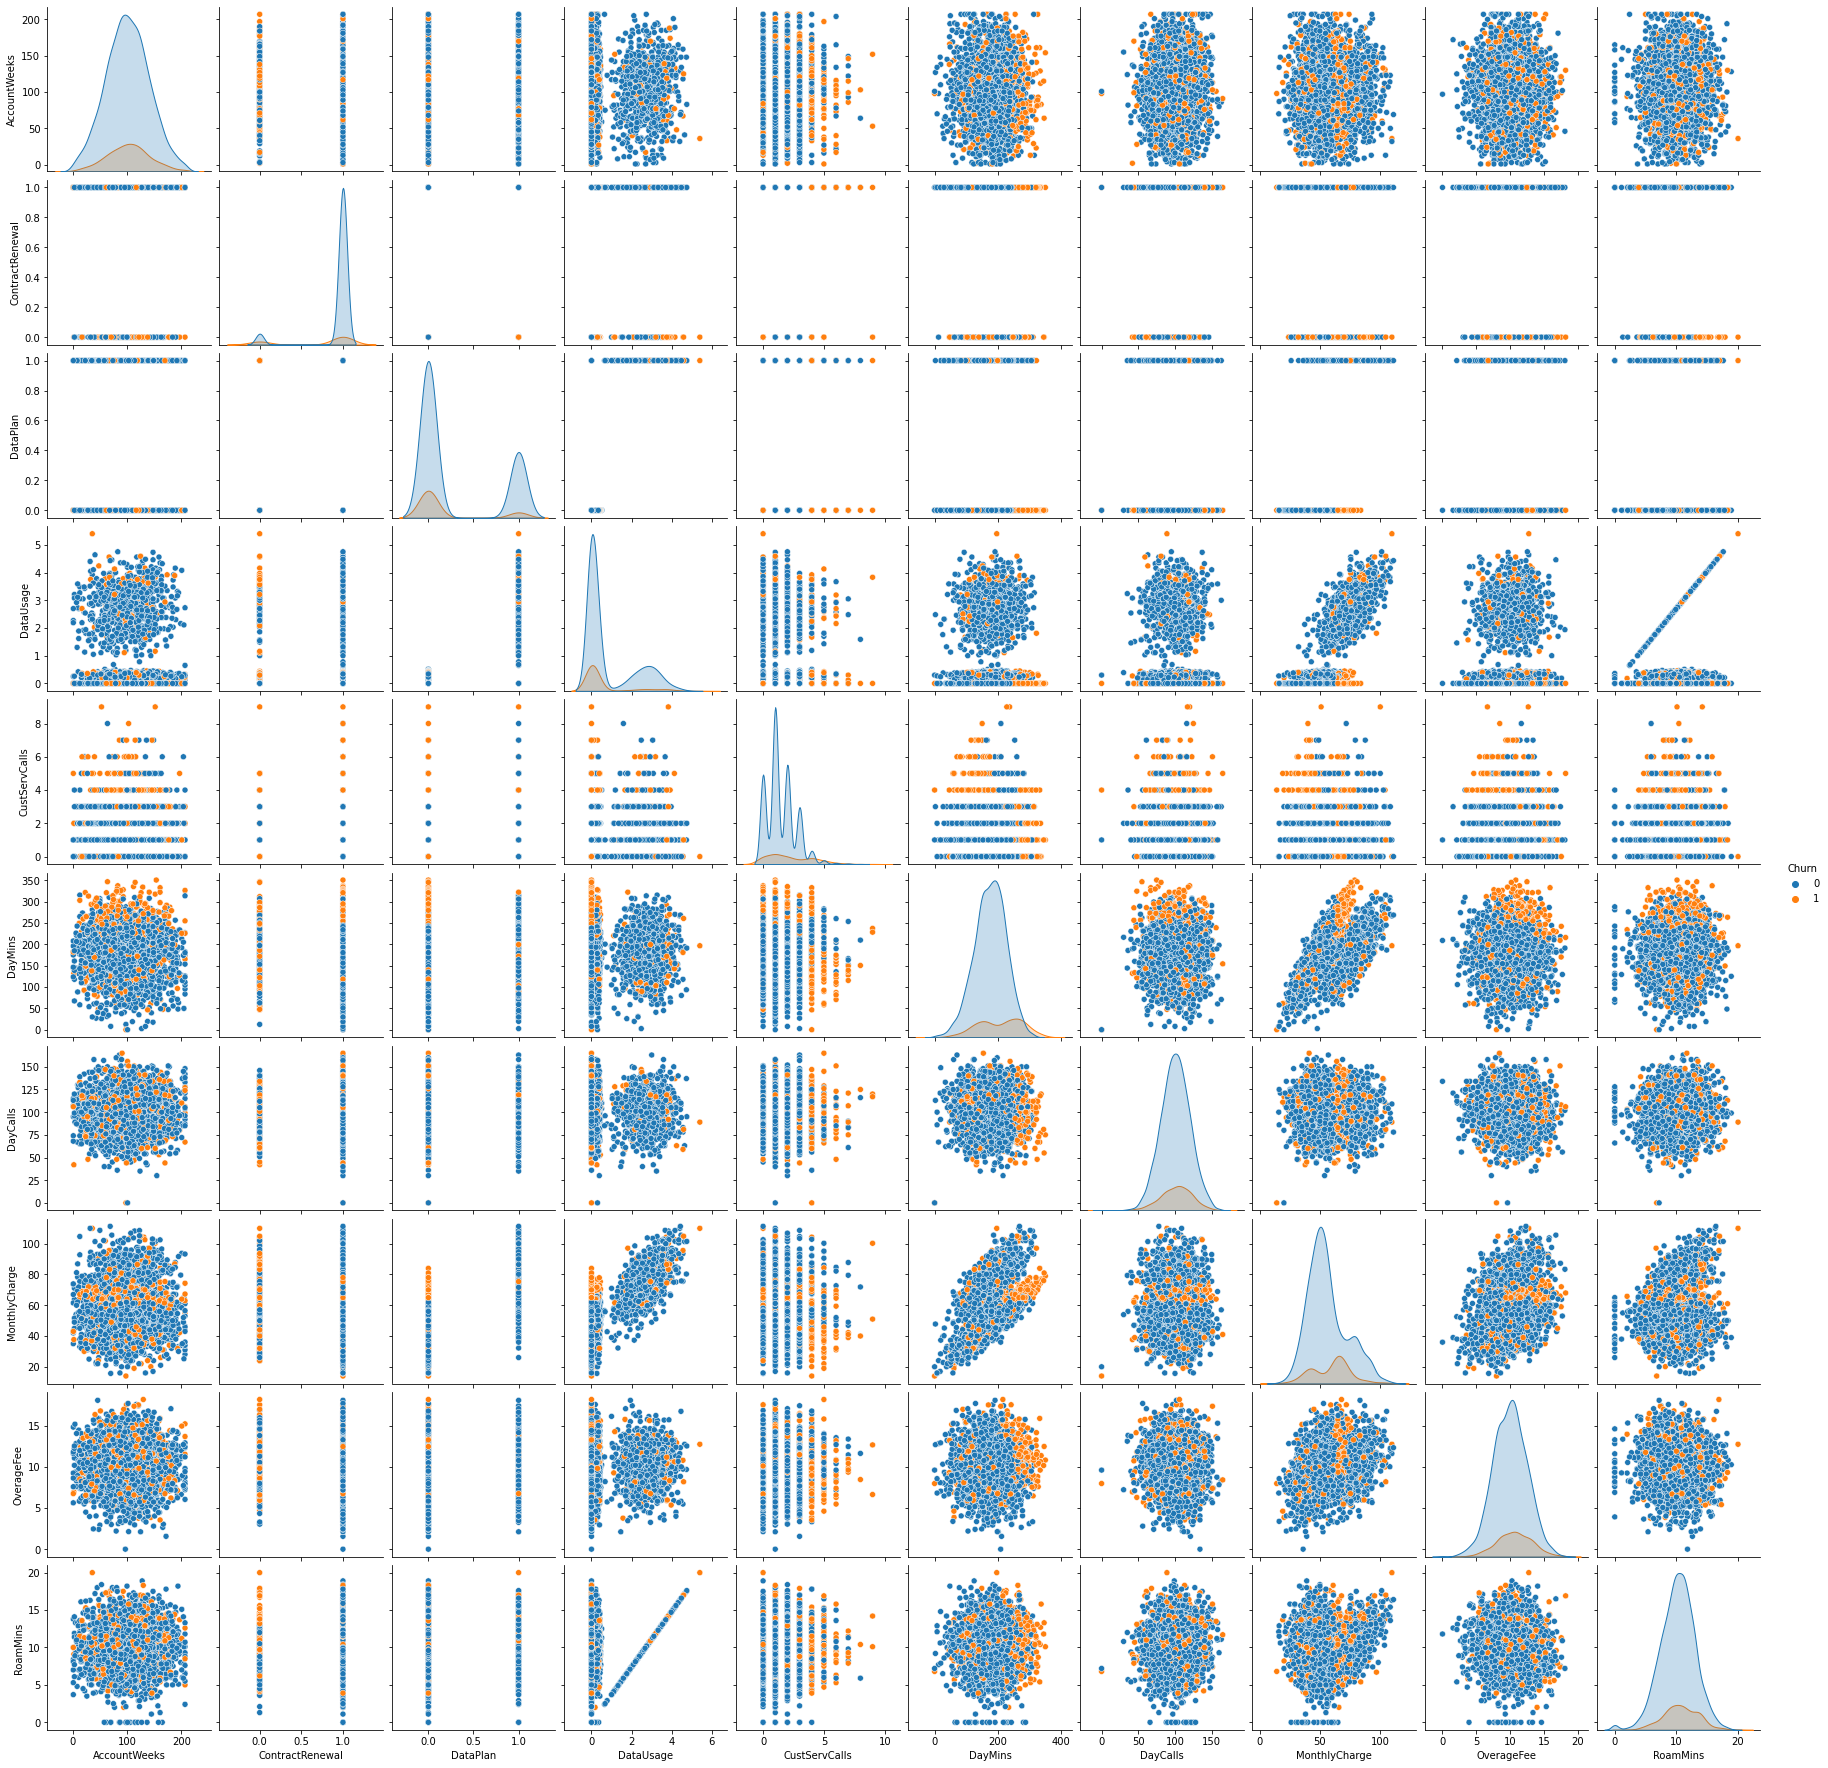

In [216]:
sns.pairplot(df,hue='Churn')

<AxesSubplot:xlabel='AccountWeeks', ylabel='DataUsage'>

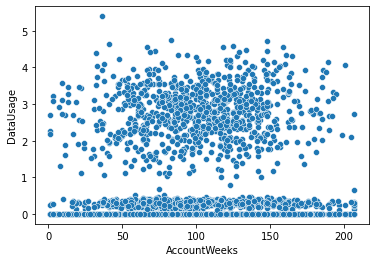

In [217]:
sns.scatterplot( x='AccountWeeks',y='DataUsage',data=df)

### decision trees doesn't need scaling
they are not sensitive to outliers

A rule is a conditional statement that can easily be understood by humans and easily used within a database to identify a set of records.

they consists of root node,leafnodes,and internal nodes


In [218]:
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

### Correlation Matrix

In [219]:
sns.heatmap(df.corr(),cmap='viridis',annot=True,annot_kws={"size":7})
plt.figure(figsize=(13,24))

<Figure size 936x1728 with 0 Axes>

<Figure size 936x1728 with 0 Axes>

In [220]:
df.corr()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016298        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016298      1.000000        -0.024892  0.003561   0.015155   
ContractRenewal -0.259852     -0.024892         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.003561        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.015155        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003586         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.007045        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.037859        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.013656        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006675        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.010687        -0.045871 -0.001318   0.162746   

                 CustServCalls   DayMins  DayCalls  MonthlyCharge  OverageFee  \
Churn                 0.208750  0.205151  0.018459       0.072313    0.092812   
AccountWeeks         -0.003586  0.007045  0.037859       0.013656   -0.006675   
ContractRenewal       0.024522 -0.049396 -0.003755      -0.047291   -0.019105   
DataPlan             -0.017824 -0.001684 -0.011086       0.737490    0.021526   
DataUsage            -0.021723  0.003176 -0.007962       0.781660    0.019637   
CustServCalls         1.000000 -0.013423 -0.018942      -0.028017   -0.012964   
DayMins              -0.013423  1.000000  0.006750       0.567968    0.007038   
DayCalls             -0.018942  0.006750  1.000000      -0.007963   -0.021449   
MonthlyCharge        -0.028017  0.567968 -0.007963       1.000000    0.281766   
OverageFee           -0.012964  0.007038 -0.021449       0.281766    1.000000   
RoamMins             -0.009640 -0.010155  0.021565       0.117433   -0.011023   

                 RoamMins  
Churn            0.068239  
AccountWeeks     0.010687  
ContractRenewal -0.045871  
DataPlan        -0.001318  
DataUsage        0.162746  
CustServCalls   -0.009640  
DayMins         -0.010155  
DayCalls         0.021565  
MonthlyCharge    0.117433  
OverageFee      -0.011023  
RoamMins         1.000000

### we seethat montly charge and dataplan are positively correlated

In [221]:
### and montly charge data usage are positively correlated
###data plan and data usage are highly correlated

### ### we have no categorical variables dont need encoding

### Model testing and Evaluation

In [222]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']

In [223]:
x_train,x_test,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [224]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [225]:
model.fit(x_train,ytrain)

LogisticRegression()

In [226]:
model.score(x_test,ytest)

0.842925659472422

In [227]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,plot_roc_curve,f1_score,roc_auc_score,roc_curve


In [228]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [229]:
a=classification_report(ytrain,y_pred_train)
print(a)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2159
           1       0.44      0.14      0.21       340

    accuracy                           0.86      2499
   macro avg       0.66      0.56      0.57      2499
weighted avg       0.82      0.86      0.83      2499



#### classification report for both training and test data

In [230]:
def compare_model_train_test(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(ytrain, y_train_pred)
    test_accuracy = accuracy_score(ytest, y_test_pred)
    train_clf_report = classification_report(ytrain, y_train_pred)
    test_clf_report = classification_report(ytest, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [231]:
compare_model_train_test(model)

Training accuracy is : 0.8587434973989596 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2159
           1       0.44      0.14      0.21       340

    accuracy                           0.86      2499
   macro avg       0.66      0.56      0.57      2499
weighted avg       0.82      0.86      0.83      2499
 
 Testing accuracy is : 0.84 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       691
           1       0.64      0.19      0.29       143

    accuracy                           0.84       834
   macro avg       0.75      0.58      0.60       834
weighted avg       0.82      0.84      0.81       834
 



### train(cm)

In [232]:
cm_train=confusion_matrix(ytrain,y_pred_train)
sns.heatmap(cm_train,annot=True, fmt='g')

<AxesSubplot:>

### test

<AxesSubplot:>

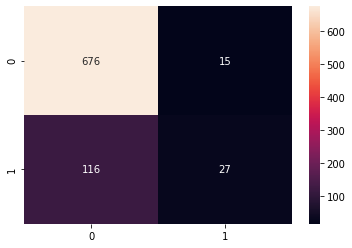

In [233]:
cm_test=confusion_matrix(ytest,y_pred_test)
sns.heatmap(cm_test,annot=True, fmt='g')

In [234]:
y_pred_rcv=model.predict_proba(x_test)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)

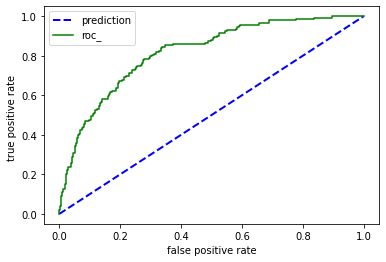

In [235]:
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [236]:
roc_auc_score(y_test,y_pred_test)

0.5038420637370931

### we see there is class imbalance here ....now we balance the data using random over sampler

In [237]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import RandomOverSampler

In [238]:
ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(x,y)
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=42)

In [239]:
y_test_ros.value_counts()

0    882
1    828
Name: Churn, dtype: int64

In [240]:
y_train_ros.value_counts()

1    2022
0    1968
Name: Churn, dtype: int64

In [241]:
model_ros=model.fit(X_train_ros,y_train_ros)

In [242]:
model_ros.score(X_test_ros,y_test_ros)

0.752046783625731

In [243]:
y_pred_ros_test=model_ros.predict(X_test_ros)
y_pred_ros_train=model_ros.predict(X_train_ros)

### test

<AxesSubplot:>

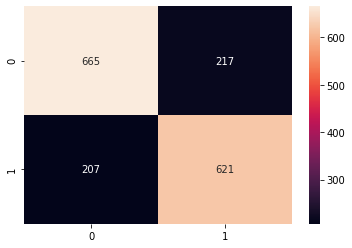

In [244]:
cm_ros=confusion_matrix(y_test_ros,y_pred_ros_test)
sns.heatmap(cm_ros,annot=True,fmt='g')

### train

<AxesSubplot:>

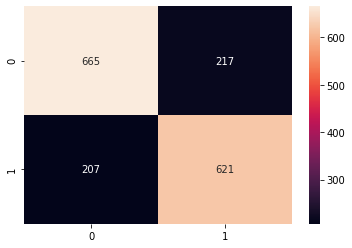

In [245]:
cm_ro=confusion_matrix(y_train_ros,y_pred_ros_train)
sns.heatmap(cm_ros,annot=True,fmt='g')

In [246]:
def compare_model_train_test(model):
    y_train_pred = model_ros.predict(X_train_ros)
    y_test_pred = model_ros.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_pred_ros_train)
    test_accuracy = accuracy_score(y_test_ros, y_pred_ros_test)
    train_clf_report = classification_report(y_train_ros, y_pred_ros_train)
    test_clf_report = classification_report(y_test_ros, y_pred_ros_test)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
                 'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [247]:
compare_model_train_test(model)

Training accuracy is : 0.7458646616541353 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1968
           1       0.76      0.74      0.75      2022

    accuracy                           0.75      3990
   macro avg       0.75      0.75      0.75      3990
weighted avg       0.75      0.75      0.75      3990
 
 Testing accuracy is : 0.75 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       882
           1       0.74      0.75      0.75       828

    accuracy                           0.75      1710
   macro avg       0.75      0.75      0.75      1710
weighted avg       0.75      0.75      0.75      1710
 



In [248]:
y_pred_rcv=model_ros.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

In [249]:
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [250]:
roc_auc_score(y_test_ros,y_pred_ros_test)

0.751984126984127

### we seethat it wiil be increased after resampling........|

# DECISION TREES CLASSIFICATIION

In [251]:
from sklearn.tree import DecisionTreeClassifier
d_c=DecisionTreeClassifier( criterion='gini',random_state=42)

In [253]:
model_dc=d_c.fit(x_train,ytrain)


In [254]:
model_dc.score(x_test,ytest)

0.8992805755395683

In [255]:
y_pred_dc_test=model_dc.predict(x_test)
y_pred_dc_train=model_dc.predict(x_train)

In [256]:
def compare_model_train_test(model):
    y_train_pred = model_dc.predict(x_train)
    y_test_pred = model_dc.predict(x_test)
    train_accuracy = accuracy_score(ytrain, y_pred_dc_train)
    test_accuracy = accuracy_score(ytest, y_pred_dc_test)
    train_clf_report = classification_report(ytrain, y_pred_dc_train)
    test_clf_report = classification_report(ytest, y_pred_dc_test)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
                 'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [257]:
compare_model_train_test(model)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2159
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499
 
 Testing accuracy is : 0.9 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       691
           1       0.71      0.69      0.70       143

    accuracy                           0.90       834
   macro avg       0.82      0.82      0.82       834
weighted avg       0.90      0.90      0.90       834
 



### test

<AxesSubplot:>

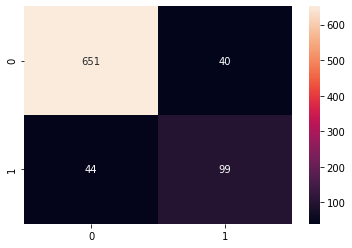

In [259]:
cm_dc=confusion_matrix(ytest,y_pred_dc_test)
sns.heatmap(cm_dc,annot=True,fmt='g')

### train 

<AxesSubplot:>

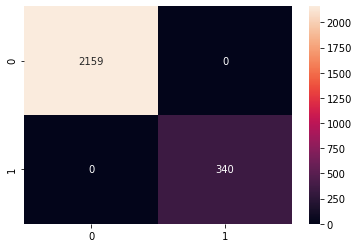

In [260]:
cm_dc_train=confusion_matrix(ytrain,y_pred_dc_train)
sns.heatmap(cm_dc_train,annot=True,fmt='g')

In [264]:
y_pred_rcv=model_ros.predict_proba(x_test)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)

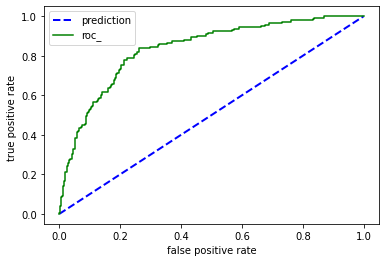

In [265]:
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [267]:
roc_auc_score(ytest,y_pred_dc_test)

0.817210286095959

### this is on normal data

### lets see what happens if we apply on the resampling data

In [282]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=42)

In [302]:
model_dc_ros=d_c.fit(X_train_ros,y_train_ros)

In [284]:
model_dc_ros.score(X_test_ros,y_test_ros)

0.9590643274853801

In [286]:
y_pred_dc_test_ros=model_dc_ros.predict(X_test_ros)
y_pred_dc_train_ros=model_dc_ros.predict(X_train_ros)

In [289]:
def compare_model_train_test(model):
    y_train_pred = model_dc_ros.predict(X_train_ros)
    y_test_pred = model_dc_ros.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_pred_dc_train_ros)
    test_accuracy = accuracy_score(y_test_ros, y_pred_dc_test_ros)
    train_clf_report = classification_report(y_train_ros, y_pred_dc_train_ros)
    test_clf_report = classification_report(y_test_ros, y_pred_dc_test_ros)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
                 'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [290]:
compare_model_train_test(model)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       1.00      1.00      1.00      2022

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990
 
 Testing accuracy is : 0.96 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       882
           1       0.92      1.00      0.96       828

    accuracy                           0.96      1710
   macro avg       0.96      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710
 



In [291]:
cm_dc=confusion_matrix(y_test_ros,y_pred_dc_test_ros)
sns.heatmap(cm_dc,annot=True,fmt='g')

<AxesSubplot:>

In [292]:
cm_dc=confusion_matrix(y_train_ros,y_pred_dc_train_ros)
sns.heatmap(cm_dc,annot=True,fmt='g')

<AxesSubplot:>

In [294]:
y_pred_rcv=model_ros.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

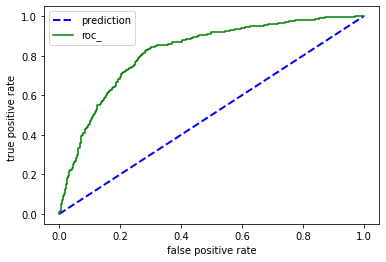

In [295]:
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [296]:
roc_auc_score(y_test_ros,y_pred_dc_test_ros)

0.9603174603174603

### take best model from these guys....

In [305]:
from sklearn.model_selection import cross_val_score     ##for logistic regression
score=cross_val_score(cm_dc,x,y,cv=10)

TypeError: estimator should be an estimator implementing 'fit' method, array([[1968,    0],
       [   0, 2022]], dtype=int64) was passed